# US-Visa-Prediction-Project


## Importing Libraries
- Load all the necessary libraries for working with the project

In [1]:
# Core Libraires
import os

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries to split the data into train and test
from sklearn.model_selection import train_test_split

# feature engineering
from sklearn.feature_extraction import DictVectorizer

# Libraries to to build model
from sklearn.linear_model import LogisticRegression

# Libraries to check model performance

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Libraries for tracking experiments 
import mlflow 

In [2]:
# Let ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Let's set an experiment name 
mlflow.set_experiment("US-Visa-Prediction-Project")


<Experiment: artifact_location='file:///home/moro/Documents/ml_projects/US-Visa-Prediction-Project/mlruns/552858987697655461', creation_time=1753002891160, experiment_id='552858987697655461', last_update_time=1753002891160, lifecycle_stage='active', name='US-Visa-Prediction-Project', tags={}>

## Loading Data 
- Load the data into the project and make a copy of it.

In [3]:
# let's load the load the data
data = pd.read_csv('./dataset/EasyVisa.csv')

In [4]:
## create a copy of the data 
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
## lets view the first five rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
## view the last five rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
## check the shape of the dataset
df.shape

(25480, 12)

In [8]:
## computing the length of the dataset
len(df)

25480

In [9]:
## lets provide a description about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [10]:
## lets compute a statistical summary of the dataset
df.describe().round()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.0,25480.0,25480.0
mean,5667.0,1979.0,74456.0
std,22878.0,42.0,52816.0
min,-26.0,1800.0,2.0
25%,1022.0,1976.0,34015.0
50%,2109.0,1997.0,70308.0
75%,3504.0,2005.0,107736.0
max,602069.0,2016.0,319210.0


In [11]:
## lets drop the id column sinces it is irrelevant to our analysis
del df['case_id']

In [12]:
## lets review our data again
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## EXploratory Data Analysis 
- What is the distribution of the number of visas granted against those denied? (Target Variable Analysis) 
- Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 
- How does the visa status vary across different continents? 
- Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
- In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
- The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## What is the distribution of number of Visas Granted Against Denied? (Target Variable Analysis) 

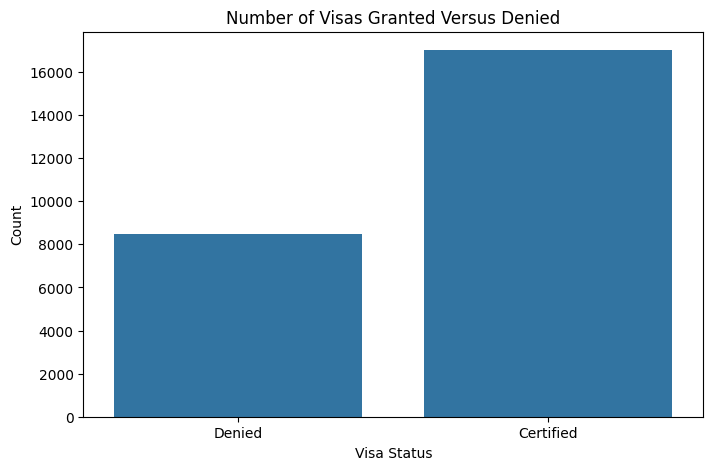

In [13]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='case_status')

plt.title("Number of Visas Granted Versus Denied")
plt.xlabel("Visa Status")
plt.ylabel("Count")

plt.show()

In [14]:
## lets get the actual numbers 
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

### 1. Does education play a role in Visa certification? 

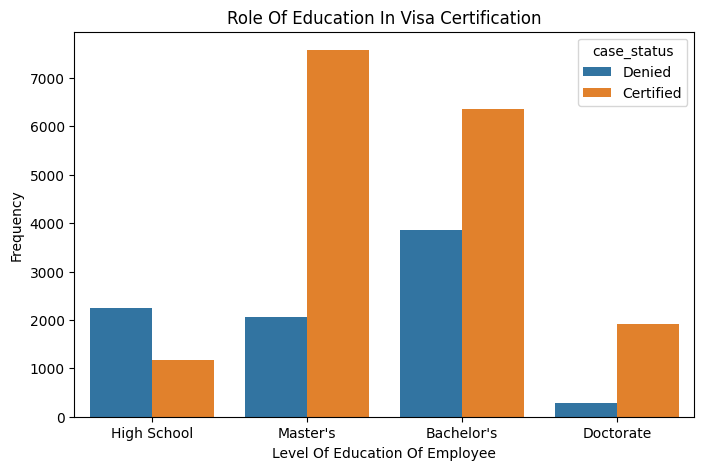

In [15]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='education_of_employee', hue='case_status')

plt.title("Role Of Education In Visa Certification")
plt.ylabel("Frequency")
plt.xlabel("Level Of Education Of Employee")


plt.show()

### 2. How Does The Visa Status Vary Across Different Continents? 

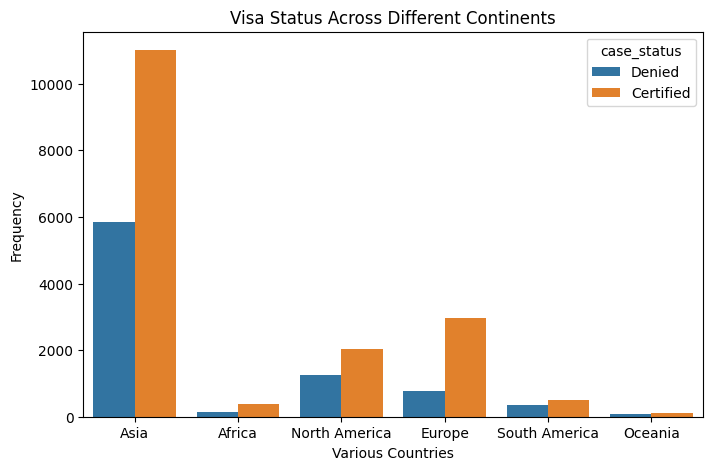

In [16]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='continent', hue='case_status')

plt.title("Visa Status Across Different Continents")
plt.ylabel("Frequency")
plt.xlabel("Various Countries")


plt.show()


### 3. Does Work Experience Influence Visa Status? 

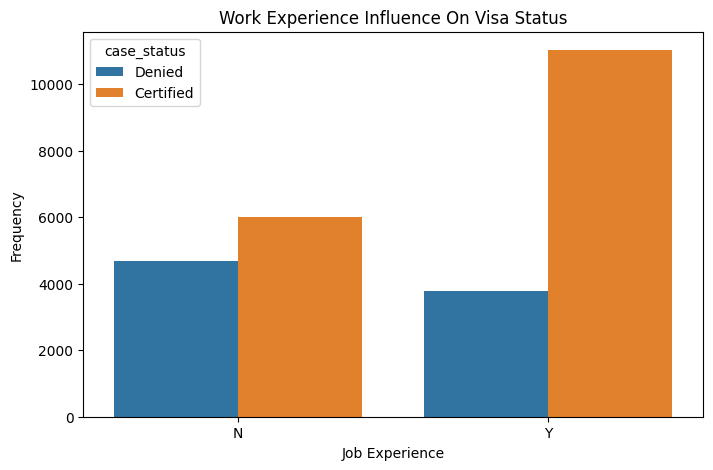

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='has_job_experience', hue='case_status')

plt.title("Work Experience Influence On Visa Status")
plt.ylabel("Frequency")
plt.xlabel("Job Experience")


plt.show()


### 4.Which pay unit is most likely to be certified for a visa? 

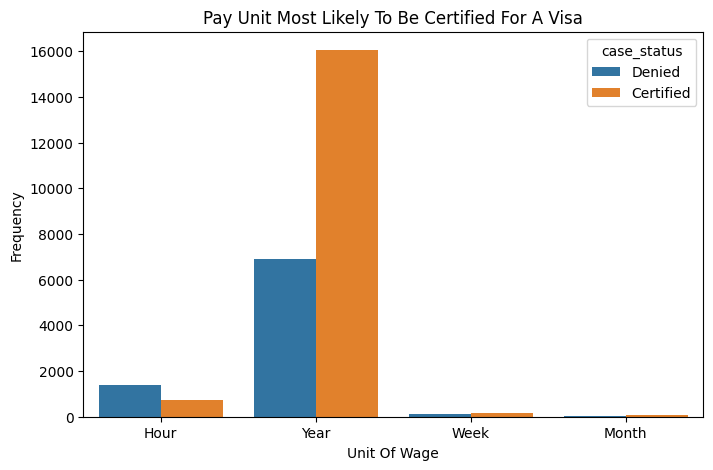

In [18]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='unit_of_wage', hue='case_status')

plt.title("Pay Unit Most Likely To Be Certified For A Visa")
plt.ylabel("Frequency")
plt.xlabel("Unit Of Wage")


plt.show()


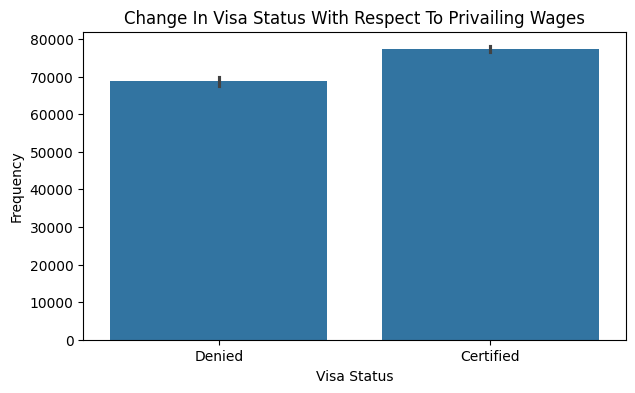

In [19]:
plt.figure(figsize=(7,4))

sns.barplot(data=df, y='prevailing_wage', x='case_status')

plt.title("Change In Visa Status With Respect To Privailing Wages")
plt.ylabel("Frequency")
plt.xlabel("Visa Status")


plt.show()

In [20]:
## 

numerical_df = df.select_dtypes(exclude=[object])

corr_matrix = numerical_df.corr()

corr_matrix

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


## Data Preprocessing

- Missing value treatment (if needed)
- Outlier detection and treatment (if needed)
- Feature Engineering (if needed)
- Any other preprocessing steps (if needed)
- Preparing data for modeling 

In [21]:
## lets check for missing values
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Outlier Analysis

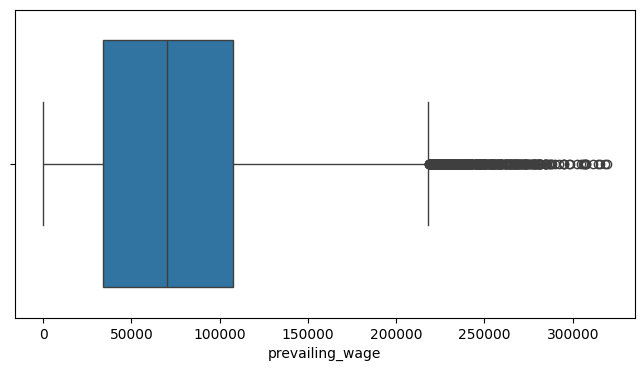

In [22]:
## lets check for outliers on the previaling wages

plt.figure(figsize=(8,4))

sns.boxplot(x=df['prevailing_wage'])

plt.show()

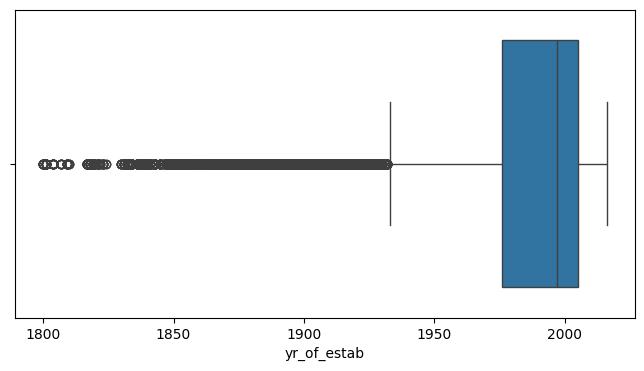

In [23]:
## lets check for outliers on the year of establishment

plt.figure(figsize=(8,4))

sns.boxplot(x=df['yr_of_estab'])

plt.show()

### Feature Engineering

In [24]:
## converting the target variable to numerical labels

df['case_status'] = (df['case_status'] == 'Certified').astype(int)
df['case_status'].head()

0    0
1    1
2    0
3    0
4    1
Name: case_status, dtype: int64

## Preparing Data For Modeling 


### Building A Validation Framework
- Lets split the data into the following proportion
    - training set 60%
    - validation dataset 20%
    - test data 20%

In [25]:
## lets split the data into train, validation and test sets
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')

Train set 15288
Valid set 5096
Test set 5096


### Let Select All The Target Column

In [26]:
## lets select the target column from the training and validation dataset
y_train = df_train.case_status.values
y_valid = df_valid.case_status.values


In [27]:
## lets delete all the target column from the rest of the training and validation dataset
del df_train['case_status']
del df_valid['case_status']

In [28]:
df_train_full.case_status.value_counts()

case_status
1    13601
0     6783
Name: count, dtype: int64

### Feature Engineering
We are going to use one-hot encoding to convert all categorical variables to numerical variable for training. 
- lets encode our categorical variables in the our dataframe
- Implement our DictVectorizer

In [29]:
## lets convert training dataframe into dictionary format
train_dict = df_train.to_dict(orient='records')
valid_dict = df_valid.to_dict(orient='records')

In [30]:
## lets implement one-hot encoding 

## creating an instance of Dictvectorizer
dv = DictVectorizer(sparse=False)

## train and transform the train dictonary data
X_train = dv.fit_transform(train_dict)

## transform the valid dictionary data
X_valid = dv.transform(valid_dict)


## Model Training with MLflow 

In [31]:
import mlflow.sklearn


with mlflow.start_run():

    ## lets log the fact that we are using a Logistic Regression model 
    mlflow.set_tag("model", "LogisticRegression")

    ## lets define and train the mode 
    lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=11)
    lr_model.fit(X_train, y_train)

    ## lets generate the validation predictions 
    y_pred_valid = lr_model.predict(X_valid)

    ## lets evaluate our models predictoins 
    accuracy = accuracy_score(y_valid, y_pred_valid)
    f1Score = f1_score(y_valid, y_pred_valid)
    recall = recall_score(y_valid, y_pred_valid)
    precision = precision_score(y_valid, y_pred_valid)

    ## lets display our metrics results 
    print(f"Validation Accuracy: {accuracy}")
    print(f"Validation f1-Score: {f1Score}")
    print(f"Validation Recall: {recall}")
    print(f"Validation Precisoni: {precision}")

    ## lets log these metrics so we can compare runs later 
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1Score)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("precison", precision)

    ## lets log our model and save it 
    mlflow.sklearn.log_model(lr_model, artifact_path="model")

    print("\nRun successfully logged to Mlflow!")


2025/07/20 10:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Validation Accuracy: 0.701138147566719
Validation f1-Score: 0.7633990989591425
Validation Recall: 0.7239245727754862
Validation Precisoni: 0.807426881367072


2025/07/20 10:41:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Run successfully logged to Mlflow!
